# Housing prediction

## 1.Frame the problem

The problem aimed to predict the median value the house price in Cal. Firstly there are several questions we should think about in advance:1. this is a supervised learning because each sample is labeled with housing price.2. the problem is a linear regression because we need to predict the exact value instead of classify the price into "cheap" or "expensive". 3. this is also batch learning because mo continuous flow of data(when dataset is large, it would better to be split into parts and apply online learning.

## 2.Fetch the data

In [2]:
import pandas as pd
import numpy as np

def load_housing_data(housing_path):
    return pd.read_csv(housing_path)

housing=load_housing_data("C:\\Users\\hasee\\workspace\\Kaggle\\handson\\Part1\\Chapter2\\housing.csv")
housing.head() #get first 5 samples

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()  #total view of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


from the data overall info we can see that there are totally 20640 examples and 9 features, and we can find that one feature 'total_bedrooms' has 207 samples are null, we should take care of it.

In [4]:
housing["ocean_proximity"].value_counts() #it shows the sample number of categories of "ocean_proximity"

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


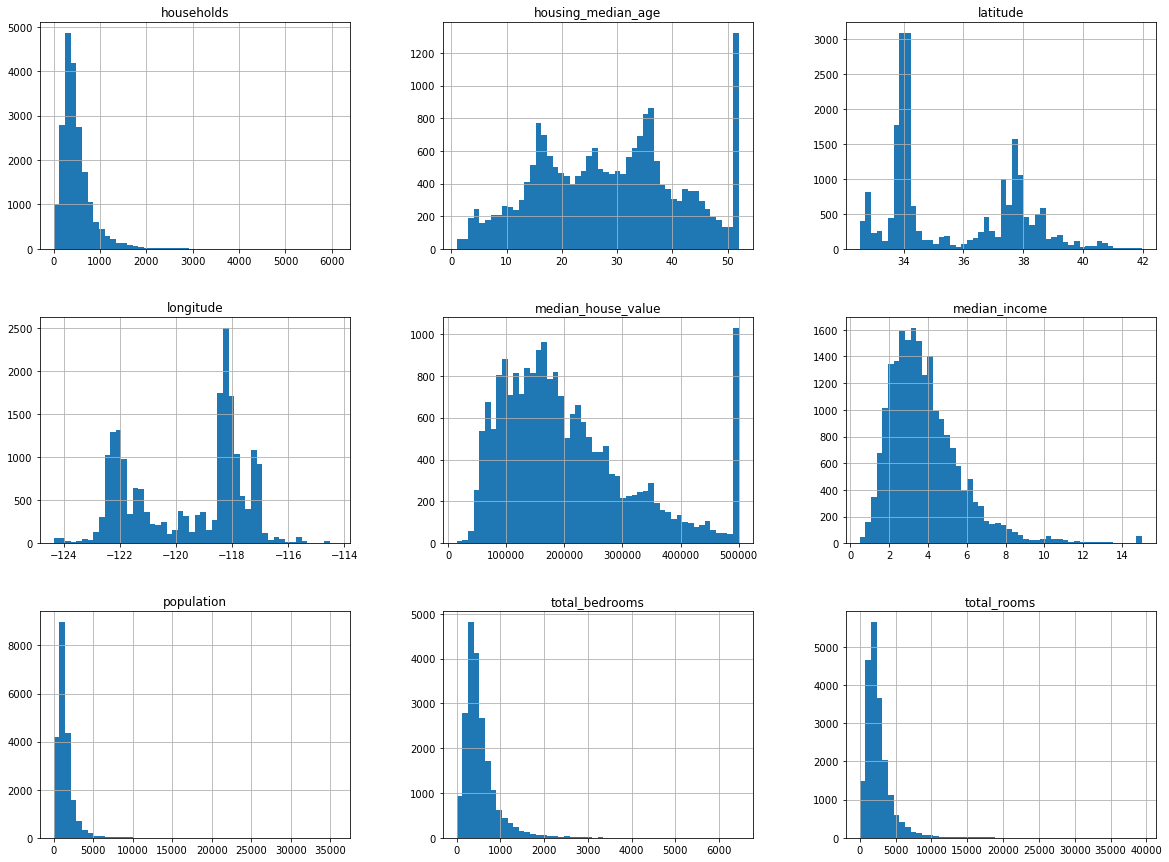

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))
plt.show()

1.From the figure, we could get a conclusion that the median_income is not expressed in USD.
2.Some data are capped, for example the 'median_house_value', there seems to be an upper limit ate 500000 USD
3.Some features are different scaled
4.The histograms are tail heavey: they extend much further to the right than to the left

## 3. Create a Test Set

In [6]:
np.random.seed(42)  #make sure the output is identical at each run

In [7]:
import hashlib

def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [8]:
housing_with_id = housing.reset_index()  #use reset_index to reset index
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [9]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
8,8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,-122222.16
10,10,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,NEAR BAY,-122222.15
11,11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY,-122222.15
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY,-122222.15
13,13,-122.26,37.84,52.0,696.0,191.0,345.0,174.0,2.6736,191300.0,NEAR BAY,-122222.16


or we can use sklearn to create the test dataset

In [10]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


suppose the median income is an important featured , and we want it categories and split the dataset accroding to the median values

In [11]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)  #np.ceil 向上取整
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)  #大于5的变5.0
#print(housing["income_cat"])

In [12]:
housing["income_cat"].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

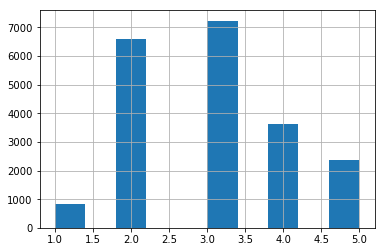

In [13]:
housing["income_cat"].hist()

then we use scikit-learn to split the dataset 'housing' according to the same proportions categories of median value into training and test

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

## Discover and Visualize the Data

In [15]:
housing=strat_train_set.copy()
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2.0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5.0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2.0
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2.0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3.0
19480,-120.97,37.66,24.0,2930.0,588.0,1448.0,570.0,3.5395,127900.0,INLAND,3.0
8879,-118.50,34.04,52.0,2233.0,317.0,769.0,277.0,8.3839,500001.0,<1H OCEAN,5.0
13685,-117.24,34.15,26.0,2041.0,293.0,936.0,375.0,6.0000,140200.0,INLAND,4.0
4937,-118.26,33.99,47.0,1865.0,465.0,1916.0,438.0,1.8242,95000.0,<1H OCEAN,2.0
4861,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999,500001.0,<1H OCEAN,1.0


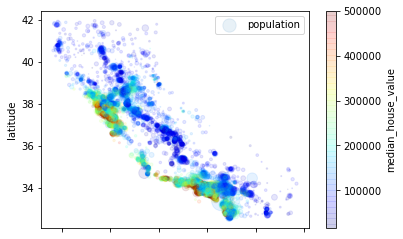

In [16]:
housing.plot(kind="scatter", x="longitude", y="latitude",alpha=0.1,
            s=housing["population"]/100, label="population",
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,) #alpha=0.1 easy to see high density area
plt.legend() #plt.legend is 图例

This image illustrates housing prices very much related to the location and population density.

In [17]:
corr_matrix= housing.corr()
print(corr_matrix)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924478           -0.105848     0.048871   
latitude            -0.924478  1.000000            0.005766    -0.039184   
housing_median_age  -0.105848  0.005766            1.000000    -0.364509   
total_rooms          0.048871 -0.039184           -0.364509     1.000000   
total_bedrooms       0.076598 -0.072419           -0.325047     0.929379   
population           0.108030 -0.115222           -0.298710     0.855109   
households           0.063070 -0.077647           -0.306428     0.918392   
median_income       -0.019583 -0.075205           -0.111360     0.200087   
median_house_value  -0.047432 -0.142724            0.114110     0.135097   
income_cat          -0.016243 -0.078848           -0.139385     0.221690   

                    total_bedrooms  population  households  median_income  \
longitude                 0.076598    0.108030    0.063070      -0.019583   
latitude 

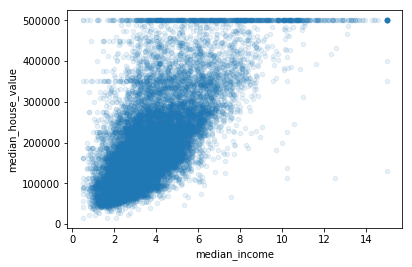

In [18]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
alpha=0.1)

** we can find two points **
- the correlation is indeed strong
- try to remove the horizontal line around 500000 dollar and 350000 dollar

** One important thing to do before applying Machine learning algorithm is various attribute combinations, For example, the
total number of rooms in a district is not very useful if you don’t know how many households there are. What you really want is the number of rooms per household.**

In [19]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [20]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
income_cat                  0.642274
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

Hey, not bad! The new bedrooms_per_room attribute is much more correlated with
the median house value than the total number of rooms or bedrooms. Apparently
houses with a lower bedroom/room ratio tend to be more expensive. The number of
rooms per household is also more informative than the total number of rooms in a
district—obviously the larger the houses, the more expensive they are.

## Prepare the Data for Machine Learning Algorithms

In [21]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing = housing.drop("income_cat", axis=1)#drop is to take out the target column
housing_labels = strat_train_set["median_house_value"].copy()
print(housing)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   
19480    -120.97     37.66                24.0       2930.0           588.0   
8879     -118.50     34.04                52.0       2233.0           317.0   
13685    -117.24     34.15                26.0       2041.0           293.0   
4937     -118.26     33.99                47.0       1865.0           465.0   
4861     -118.28     34.02                29.0        515.0           229.0   
16365    -121.31     38.02                24.0       4157.0           951.0   
19684    -121.62     39.14                41.0      

let us split the predictors and the labels( x and y),and there are 2 ways to do with missing data

In [22]:
housing.dropna(subset=["total_bedrooms"])  #return the entries which data is not missing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
19480,-120.97,37.66,24.0,2930.0,588.0,1448.0,570.0,3.5395,INLAND
8879,-118.50,34.04,52.0,2233.0,317.0,769.0,277.0,8.3839,<1H OCEAN
13685,-117.24,34.15,26.0,2041.0,293.0,936.0,375.0,6.0000,INLAND
4937,-118.26,33.99,47.0,1865.0,465.0,1916.0,438.0,1.8242,<1H OCEAN
4861,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999,<1H OCEAN


In [23]:
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median) #fill the missing data entries with median value

17606     351.0
18632     108.0
14650     471.0
3230      371.0
3555     1525.0
19480     588.0
8879      317.0
13685     293.0
4937      465.0
4861      229.0
16365     951.0
19684     559.0
19234     501.0
13956     582.0
2390      495.0
11176     649.0
15614     545.0
2953      251.0
13209     409.0
6569      261.0
5825      913.0
18086     538.0
16718     945.0
13600     278.0
13989     444.0
15168     190.0
6747      563.0
7398      366.0
5562      133.0
16121     416.0
          ...  
12380     767.0
5618       24.0
10060     539.0
18067     438.0
4471      797.0
19786     300.0
9969      393.0
14621    1051.0
579       302.0
11682    1615.0
245       460.0
12130     537.0
16441     544.0
11016     428.0
19934     422.0
1364       34.0
1236      829.0
5364      272.0
11703     300.0
10356     449.0
15270     515.0
3754      373.0
12166     756.0
6003      932.0
7364      212.0
6563      236.0
12053     294.0
13908     872.0
11159     380.0
15775     682.0
Name: total_bedrooms, Le

you have to save the median value because you will replace the missing values in the test set as well

In [24]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")
print(imputer)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)


In [25]:
housing_num = housing.drop("ocean_proximity", axis=1) #because imputer can only work on the numerical features or attributes, we should take out the non-numerical features
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [26]:
imputer.statistics_

array([ -118.51  ,    34.26  ,    29.    ,  2119.5   ,   433.    ,
        1164.    ,   408.    ,     3.5409])

In [27]:
housing_num.median().values

array([ -118.51  ,    34.26  ,    29.    ,  2119.5   ,   433.    ,
        1164.    ,   408.    ,     3.5409])

both values are the same

In [28]:
X = imputer.transform(housing_num)  #X is a Numpy array and we need to transfer into a Pandas DataFrame
housing_tr=pd.DataFrame(X, columns=housing_num.columns)
print(housing)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   
19480    -120.97     37.66                24.0       2930.0           588.0   
8879     -118.50     34.04                52.0       2233.0           317.0   
13685    -117.24     34.15                26.0       2041.0           293.0   
4937     -118.26     33.99                47.0       1865.0           465.0   
4861     -118.28     34.02                29.0        515.0           229.0   
16365    -121.31     38.02                24.0       4157.0           951.0   
19684    -121.62     39.14                41.0      

**However, the feature or attribute "ocean_proximity" is texted , we are going to convert text labels to number**

In [29]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
print(housing_cat)
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
19480        INLAND
8879      <1H OCEAN
13685        INLAND
4937      <1H OCEAN
4861      <1H OCEAN
16365        INLAND
19684        INLAND
19234     <1H OCEAN
13956        INLAND
2390         INLAND
11176     <1H OCEAN
15614      NEAR BAY
2953         INLAND
13209        INLAND
6569         INLAND
5825      <1H OCEAN
18086     <1H OCEAN
16718     <1H OCEAN
13600        INLAND
13989        INLAND
15168     <1H OCEAN
6747      <1H OCEAN
7398      <1H OCEAN
5562      <1H OCEAN
16121      NEAR BAY
            ...    
12380        INLAND
5618     NEAR OCEAN
10060        INLAND
18067     <1H OCEAN
4471      <1H OCEAN
19786        INLAND
9969         INLAND
14621    NEAR OCEAN
579        NEAR BAY
11682     <1H OCEAN
245        NEAR BAY
12130        INLAND
16441        INLAND
11016     <1H OCEAN
19934        INLAND
1364       NEAR BAY
1236         INLAND
5364      <1H OCEAN
11703     <1H OCEAN


array([0, 0, 4, ..., 1, 0, 3], dtype=int64)

In [30]:
print(encoder.classes_) #can see the corresponding mapping number and classes, e.g. 1H OCEAN is '0'

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [31]:
housing_cat_encoded.reshape(-1,1) 
housing_cat_encoded.shape

(16512,)

NumPy’s reshape() function allows one dimension to be –1, which means “unspecified”: the value is inferred
from the length of the array and the remaining dimensions.

In [32]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot=encoder.fit_transform(housing_cat_encoded.reshape(-1,1)) #the output is a Scipy sparse matrix , not Numpy arrary

In [33]:
housing_cat_1hot.toarray()  #convert it into Numpy array

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       ..., 
       [ 0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.]])

use Label Binarizer:from text categories to integer categories, then
from integer categories to one-hot vectors

In [34]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ..., 
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [35]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None): #这里的self相当于引用类：self.transform=CombinedAttributesAdder.transform
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
b_adder=attr_adder.fit(housing.values)
housing_extra_attribs = attr_adder.transform(housing.values)

In [36]:
housing_extra_attribs = pd.DataFrame(housing_extra_attribs, columns=list(housing.columns)+["rooms_per_household", "population_per_household"])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
1,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
2,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
4,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


** Construct transformation Pipeline **

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
('imputer', Imputer(strategy="median")),
('attribs_adder', CombinedAttributesAdder()),
('std_scaler', StandardScaler()),
])
housing_num_tr = num_pipeline.fit_transform(housing_num) #fit_transform= first fit() then transform() ,only to training set
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
19480,-120.97,37.66,24.0,2930.0,588.0,1448.0,570.0,3.5395
8879,-118.50,34.04,52.0,2233.0,317.0,769.0,277.0,8.3839
13685,-117.24,34.15,26.0,2041.0,293.0,936.0,375.0,6.0000
4937,-118.26,33.99,47.0,1865.0,465.0,1916.0,438.0,1.8242
4861,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999


then we add the text convert Labelbinarizer into the pipeline

In [38]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

because Scikit-learning can not handle the pandas framework,so we need to convert pandas into numpy array

In [39]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self,X):
        return X[self.attribute_names].values  #  .values : transform the value of panda list into numpy array

In [40]:
from sklearn.pipeline import FeatureUnion
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', Imputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
     ])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('label_binarizer', LabelBinarizer()),
])

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

In [41]:
housing_prepared= full_pipeline.fit_transform(housing)
print(housing_prepared)
print(housing_prepared.shape)

[[-1.15604281  0.77194962  0.74333089 ...,  0.          0.          0.        ]
 [-1.17602483  0.6596948  -1.1653172  ...,  0.          0.          0.        ]
 [ 1.18684903 -1.34218285  0.18664186 ...,  0.          0.          1.        ]
 ..., 
 [ 1.58648943 -0.72478134 -1.56295222 ...,  0.          0.          0.        ]
 [ 0.78221312 -0.85106801  0.18664186 ...,  0.          0.          0.        ]
 [-1.43579109  0.99645926  1.85670895 ...,  0.          1.          0.        ]]
(16512, 16)


## select and train one model

In [42]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(housing_prepared,housing_labels) #trained prepared housing data and obtain a linear model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
# let's try the full pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print(some_data_prepared.shape)

print("Predictions:", lin_reg.predict(some_data_prepared))

(5, 16)
Predictions: [ 210644.60459286  317768.80697211  210956.43331178   59218.98886849
  189747.55849879]


In [44]:
print(list(some_labels))

[286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


then we apply the RMSE on the whole training set

In [45]:
from sklearn.metrics import mean_squared_error
housing_prediction=lin_reg.predict(housing_prepared)
lin_mse=mean_squared_error(housing_labels,housing_prediction)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

68628.198198489234

this is an example which underfit the model

** there are 3 methods to fix the underfit in total**
- select a more powerful model
- training with better features(e.g. log of the population)
- reduce the constraints on the model(no for this probelm, because the model is not regularized yet)

so we decided to try another model Decision trees

In [46]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [47]:
housing_prediction=tree_reg.predict(housing_prepared)
tree_mse=mean_squared_error(housing_labels,housing_prediction)
tree_rmse=np.sqrt(tree_mse)
tree_rmse

0.0

now the error is 0 means that the model is perfectly fit the training set, but the overfitting may exist, let us try on the test data using cross-validation

divided training set into 10 parts

In [48]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(tree_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(rmse_scores)

Scores: [ 68292.14894598  66782.53562278  70759.47269143  69889.91977163
  70589.76882605  74182.94790873  71548.27958524  70250.63692186
  76559.98348136  69500.68470599]
Mean: 70835.6378461
Standard deviation: 2654.47566618


it looks not good, let us compared with the linear model

In [49]:
lin_scores=cross_val_score(lin_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
lin_rmse_scores=np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)

Scores: [ 66782.73843989  66960.118071    70347.95244419  74739.57052552
  68031.13388938  71193.84183426  64969.63056405  68281.61137997
  71552.91566558  67665.10082067]
Mean: 69052.4613635
Standard deviation: 2731.6740018


we can see that the error or the scores of linear model is smaller than descision tree, so the descision tree model is indeed overfitting

In [50]:
from sklearn.ensemble import RandomForestRegressor
forest_reg=RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)
housing_prediction=forest_reg.predict(housing_prepared)
forest_mse=mean_squared_error(housing_labels,housing_prediction)
forest_rmse=np.sqrt(forest_mse)
print(forest_rmse)

forest_scores=cross_val_score(forest_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
forest_rmse_scores=np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)

22273.3604835
Scores: [ 52358.66679404  49743.79903788  51335.21486934  54925.88657132
  52257.98169035  55720.86291923  52842.69505175  50082.9703802
  55483.30713101  53171.12873845]
Mean: 52792.2513184
Standard deviation: 1993.65740926


as we can see , due to the consequence of cross validation,the randomforest method gets smallest error than before ,but the score on training set is still lower than scores on validation sets

## Fine-Tune your model

### Grid Search

In [51]:
from sklearn.model_selection import GridSearchCV

param_grid= [{"n_estimators":[3,10,30],"max_features":[2,4,6,8]},
           {"bootstrap":[False],"n_estimators":[3,10],"max_features":[2,3,4]}]
forest_reg=RandomForestRegressor()
grid_search=GridSearchCV(forest_reg,param_grid,cv=5,scoring="neg_mean_squared_error")
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [52]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

in the dict 1,there are totally 3x4=12 combinations of hyperparameters,and dict 2 there are 2x3=6 combinations, and cross validation sets are 5, so the total computation is 90, we also get the best hyperparameters

In [53]:
curves= grid_search.cv_results_
curves

{'mean_fit_time': array([ 0.10773039,  0.34669528,  1.04765682,  0.17653217,  0.5776341 ,
         1.70756044,  0.23853951,  0.79651961,  2.37843137,  0.30525479,
         1.0160429 ,  3.01973977,  0.16985559,  0.56013279,  0.22627125,
         0.74604383,  0.27549329,  0.93573012]),
 'mean_score_time': array([ 0.00542846,  0.01464744,  0.04254217,  0.00542917,  0.01473165,
         0.04271107,  0.00521388,  0.01474466,  0.04301968,  0.00540271,
         0.01504173,  0.04211292,  0.00599513,  0.01723733,  0.00612822,
         0.01696739,  0.00572243,  0.01655407]),
 'mean_test_score': array([ -4.17608977e+09,  -3.08122606e+09,  -2.81054417e+09,
         -3.64191583e+09,  -2.77781928e+09,  -2.55872308e+09,
         -3.38350621e+09,  -2.74989244e+09,  -2.48009999e+09,
         -3.50325841e+09,  -2.73081069e+09,  -2.51366928e+09,
         -3.96306503e+09,  -2.98061368e+09,  -3.55157387e+09,
         -2.76443597e+09,  -3.44240685e+09,  -2.71008011e+09]),
 'mean_train_score': array([ -1.096

In [54]:
for mean_scores, params in zip(curves["mean_test_score"],curves["params"]):
    print(np.sqrt(-mean_scores),params)

64622.6722294 {'max_features': 2, 'n_estimators': 3}
55508.7926147 {'max_features': 2, 'n_estimators': 10}
53014.5656175 {'max_features': 2, 'n_estimators': 30}
60348.2876975 {'max_features': 4, 'n_estimators': 3}
52705.0213752 {'max_features': 4, 'n_estimators': 10}
50583.822279 {'max_features': 4, 'n_estimators': 30}
58167.9139019 {'max_features': 6, 'n_estimators': 3}
52439.4168455 {'max_features': 6, 'n_estimators': 10}
49800.6023307 {'max_features': 6, 'n_estimators': 30}
59188.3300189 {'max_features': 8, 'n_estimators': 3}
52257.1592105 {'max_features': 8, 'n_estimators': 10}
50136.5064742 {'max_features': 8, 'n_estimators': 30}
62952.8794716 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54594.9968203 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59595.0825759 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52577.9037875 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
58672.0278279 {'bootstrap': False, 'max_features': 4, 'n_estima

as we can see ,max_features': 6, 'n_estimators': 30 get the lowest score

Then let us evaluate the importance of features

In [55]:
feature_importances= grid_search.best_estimator_.feature_importances_
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_one_hot_attribs=list(encoder.classes_)
attributes=num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances,attributes),reverse=False)

[(4.1781449362410541e-05, 'ISLAND'),
 (0.0045908373772918674, 'NEAR OCEAN'),
 (0.0054478737988722069, 'NEAR BAY'),
 (0.015903506041215779, 'households'),
 (0.015980343769714488, 'total_bedrooms'),
 (0.017593757464570588, 'population'),
 (0.018018587120756983, 'total_rooms'),
 (0.020803365111524794, '<1H OCEAN'),
 (0.0411193221028162, 'housing_median_age'),
 (0.059959005675432907, 'bedrooms_per_room'),
 (0.064096478798103249, 'rooms_per_hhold'),
 (0.073427751879875533, 'latitude'),
 (0.084662329015982446, 'longitude'),
 (0.10704724535639938, 'pop_per_hhold'),
 (0.14989097419533737, 'INLAND'),
 (0.32141684084274375, 'median_income')]

sort()与sorted()的不同在于，sort是在原位重新排列列表，而sorted()是产生一个新的列表。
Sorting basic:

 print sorted([5, 2, 3, 1, 4])
 
[1, 2, 3, 4, 5]

 L = [5, 2, 3, 1, 4]
 
 L.sort()
 
 print L
 
[1, 2, 3, 4, 5]

as we can see, $<1H OCEAN$is more important than $NEAR OCEAN$ $NEAR BAY$ and $ISLAND$ , so we should drop out the other three features

### Evaluate Your System on the Test Set

finally we test our model on the test dataset

In [56]:
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5.0
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN,4.0
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN,3.0
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND,3.0
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND,3.0
20552,-121.80,38.68,11.0,3851.0,892.0,1847.0,747.0,3.4331,120600.0,INLAND,3.0
19989,-119.32,36.19,11.0,1281.0,291.0,861.0,313.0,1.0962,72300.0,INLAND,1.0
17049,-122.26,37.46,26.0,5067.0,750.0,1996.0,728.0,7.0001,500001.0,NEAR OCEAN,5.0
13692,-117.24,34.13,26.0,3774.0,716.0,1913.0,620.0,3.3534,98900.0,INLAND,3.0
13916,-116.15,34.14,18.0,3312.0,705.0,1251.0,512.0,3.0139,82600.0,INLAND,3.0


In [57]:
X_test=strat_test_set.drop("median_house_value",axis=1)
X_test=X_test.drop("income_cat",axis=1)
Y_test=strat_test_set["median_house_value"].copy()
X_test_prepared=full_pipeline.transform(X_test)

** NOTICE **
- dont miss up the strat_test_set.copy("median_house_value") and strat_test_set["median_house_value"].copy()
- only appy transform to test dataset, not fit

In [58]:
final_model= grid_search.best_estimator_
Y_prediction= final_model.predict(X_test_prepared)
final_mse=mean_squared_error(Y_test,Y_prediction)
final_rmse=np.sqrt(final_mse)
final_rmse

47414.930132678455

## Exercise

### Exercise 1

$kernel(rbf)=exp(\gamma||x-x_{i}||^2)$
$kernel(linear)=x-x_{i}$


In [59]:
from sklearn.svm import SVR
svm_reg=SVR()

param_grid=[{"kernel":["linear"],"C":[100.,300.,1000.,3000.,10000.,30000]},
           {"kernel":["rbf"],"C":[1.,3.,10.,30.],
            "gamma":[0.01,0.03,0.1,0.3]}]
grid_search=GridSearchCV(svm_reg,param_grid,cv=5,scoring="neg_mean_squared_error",verbose=2,n_jobs=4)
grid_search.fit(housing_prepared,housing_labels)

Fitting 5 folds for each of 22 candidates, totalling 110 fits


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  3.5min
[Parallel(n_jobs=4)]: Done 110 out of 110 | elapsed: 13.5min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid=[{'kernel': ['linear'], 'C': [100.0, 300.0, 1000.0, 3000.0, 10000.0, 30000]}, {'kernel': ['rbf'], 'C': [1.0, 3.0, 10.0, 30.0], 'gamma': [0.01, 0.03, 0.1, 0.3]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=2)

number of combinations: dict 1: 6, dict 2: 4x4=16 , totoal computation: (16+6)x5=110

In [60]:
grid_search.best_params_

{'C': 30000, 'kernel': 'linear'}

In [61]:
svm_rmse=np.sqrt(-grid_search.best_score_)
svm_rmse

70363.903139641669

and then we apply the best estimator of SVM on the test dataset and see what is going on?

In [62]:
final_model=grid_search.best_estimator_
Y_prediction=final_model.predict(X_test_prepared)
final_mse=mean_squared_error(Y_test,Y_prediction)
final_rmse=np.sqrt(final_mse)
final_rmse

68139.438913272621

the error scores is larger than the RandomForest

### Exercise 2

replace the GridSearchCV with RandomizedSearchCV

In [63]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal  #reciprocal.pdf(x, a, b) = 1 / (x*log(b/a)),expon.pdf(x) = exp(-x)

param_distribs={
    'kernel':['linear','rbf'],
    'C': reciprocal(20,20000), #reciprocal(a, b)
    'gamma':expon(scale=1.0)
}

param_distribs

{'C': <scipy.stats._distn_infrastructure.rv_frozen at 0x1752caf8278>,
 'gamma': <scipy.stats._distn_infrastructure.rv_frozen at 0x1752caf8b00>,
 'kernel': ['linear', 'rbf']}

In [64]:
svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=20, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, n_jobs=4, random_state=42)   
#random_state is the random seed for the tuning
#n_iter:Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.
rnd_search.fit(housing_prepared,housing_labels)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  3.9min
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed: 11.1min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
          fit_params={}, iid=True, n_iter=20, n_jobs=4,
          param_distributions={'kernel': ['linear', 'rbf'], 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001752CAF8278>, 'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001752CAF8B00>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring='neg_mean_squared_error',
          verbose=2)

the computation is 20x5=100 fits

In [65]:
negative_mse=rnd_search.best_score_
rmse=np.sqrt(-negative_mse)
rmse

58974.144685769359

comparing with using GridSearchCV, the scores is much closer to the RandomForest, so using RandomizedSearchCV is better fitted in SVM

In [66]:
rnd_search.best_params_

{'C': 16683.860588281546, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}

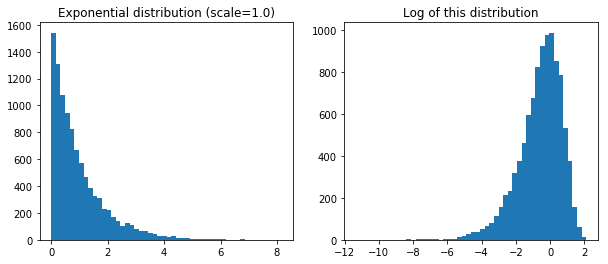

In [67]:
expon_distrib = expon(scale=1.)
samples = expon_distrib.rvs(10000, random_state=42)  # .rvs : Generate random numbers:

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Exponential distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()


Let's look at the exponential distribution we used, with scale=1.0. Note that some samples are much larger or smaller than 1.0, but when you look at the log of the distribution, you can see that most values are actually concentrated roughly in the range of exp(-2) to exp(+2), which is about 0.1 to 7.4

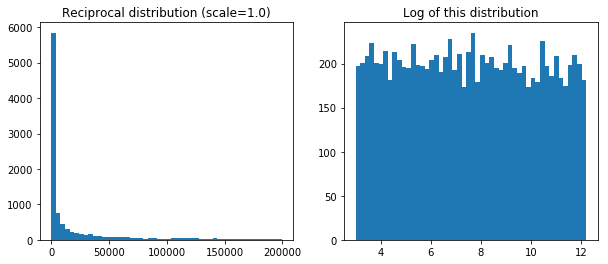

In [68]:
reciprocal_distrib = reciprocal(20, 200000)
samples = reciprocal_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Reciprocal distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()


The distribution we used for C looks quite different: the scale of the samples is picked from a uniform distribution within a given range, which is why the right graph, which represents the log of the samples, looks roughly constant. This distribution is useful when you don't have a clue of what the target scale is 


The reciprocal distribution is useful when you have no idea what the scale of the hyperparameter should be (indeed, as you can see on the figure on the right, all scales are equally likely, within the given range), whereas the exponential distribution is best when you know (more or less) what the scale of the hyperparameter should be.

### Exercise 3

In [69]:
from sklearn.base import BaseEstimator, TransformerMixin
def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])  
#numpy.argpartition(a, kth, axis=-1, kind='introselect', order=None)
#a is array to sort, kth is the elemnt k is a mark

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
            self.feature_importances=feature_importances
            self.k=k
    def fit(self, X, y=None):
        self.feature_indices=indices_of_top_k(self.feature_importances,self.k)
        return self
    def transform(self,X):
        return X[:, self.feature_indices]

In [70]:
feature_importances

array([  8.46623290e-02,   7.34277519e-02,   4.11193221e-02,
         1.80185871e-02,   1.59803438e-02,   1.75937575e-02,
         1.59035060e-02,   3.21416841e-01,   6.40964788e-02,
         1.07047245e-01,   5.99590057e-02,   2.08033651e-02,
         1.49890974e-01,   4.17814494e-05,   5.44787380e-03,
         4.59083738e-03])

In [71]:
k=5
top_k_feature_indices=indices_of_top_k(feature_importances,k)
top_k_feature_indices

array([ 0,  1,  7,  9, 12], dtype=int64)

In [72]:
np.array(attributes)[top_k_feature_indices]

array(['longitude', 'latitude', 'median_income', 'pop_per_hhold', 'INLAND'], 
      dtype='<U18')

Then let us make a double check

In [73]:
sorted(zip(feature_importances,attributes),reverse=True)[:k]

[(0.32141684084274375, 'median_income'),
 (0.14989097419533737, 'INLAND'),
 (0.10704724535639938, 'pop_per_hhold'),
 (0.084662329015982446, 'longitude'),
 (0.073427751879875533, 'latitude')]

so we get the same results, then we just create the new pipeline which contains previous full pipeline and new feature selection pipeline

In [74]:
preparation_and_feature_selection_pipeline= Pipeline([("preparation",full_pipeline),
                                                     ("feature_selection",TopFeatureSelector(feature_importances,k))])
# Pipeline([("",),("",)])

In [75]:
housing_prepared_top_k_feature=preparation_and_feature_selection_pipeline.fit_transform(housing)
housing_prepared_top_k_feature

array([[-1.15604281,  0.77194962, -0.61493744, -0.08649871,  0.        ],
       [-1.17602483,  0.6596948 ,  1.33645936, -0.03353391,  0.        ],
       [ 1.18684903, -1.34218285, -0.5320456 , -0.09240499,  0.        ],
       ..., 
       [ 1.58648943, -0.72478134, -0.3167053 , -0.03055414,  1.        ],
       [ 0.78221312, -0.85106801,  0.09812139,  0.06150916,  0.        ],
       [-1.43579109,  0.99645926, -0.15779865, -0.09586294,  0.        ]])

let us use housing_prepared dataset to make a check

In [76]:
housing_prepared[:,top_k_feature_indices]

array([[-1.15604281,  0.77194962, -0.61493744, -0.08649871,  0.        ],
       [-1.17602483,  0.6596948 ,  1.33645936, -0.03353391,  0.        ],
       [ 1.18684903, -1.34218285, -0.5320456 , -0.09240499,  0.        ],
       ..., 
       [ 1.58648943, -0.72478134, -0.3167053 , -0.03055414,  1.        ],
       [ 0.78221312, -0.85106801,  0.09812139,  0.06150916,  0.        ],
       [-1.43579109,  0.99645926, -0.15779865, -0.09586294,  0.        ]])

it is the same,success

### Exercise 4

create a pipeline which contains the preparation , feature selection and prediction

In [82]:
prepare_feature_select_prediction_pipeline=Pipeline([("preparation",full_pipeline),
                                                     ("feature_selection",TopFeatureSelector(feature_importances,k)),
                                                    ("svm_reg",SVR(**rnd_search.best_params_))])
# why I can't use this :rnd_search.best_estimator_.predict(X)

In [78]:
prepare_feature_select_prediction_pipeline.fit(housing, housing_labels)

TypeError: fit() takes 2 positional arguments but 3 were given

### Exercise 5

Automatically explore some preparation options using GridSearchCV.

In [86]:
param_grid = [
        {'preparation__num_pipeline__imputer__strategy': ['mean', 'median', 'most_frequent'],#_A__method_name 双下划线代表从属
         'feature_selection__k': [3, 4, 5, 6, 7]}
]

grid_search_prep = GridSearchCV(prepare_feature_select_prediction_pipeline, param_grid, cv=5,
                                scoring='neg_mean_squared_error', verbose=2, n_jobs=4)
grid_search_prep
#grid_search_prep.fit(housing, housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('preparation', FeatureUnion(n_jobs=1,
       transformer_list=[('num_pipeline', Pipeline(steps=[('selector', DataFrameSelector(attribute_names=['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'])), ('imputer', Imputer(... gamma=0.26497040005002437, kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params={}, iid=True, n_jobs=4,
       param_grid=[{'preparation__num_pipeline__imputer__strategy': ['mean', 'median', 'most_frequent'], 'feature_selection__k': [3, 4, 5, 6, 7]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=2)

In [ ]:
grid_search_prep.fit(housing, housing_labels)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
